In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
kyphosis = pd.read_csv('kyphosis.csv')

In [10]:
kyphosis.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
kyphosis.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [29]:
kyphosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [30]:
kyphosis.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [32]:
kyphosis['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

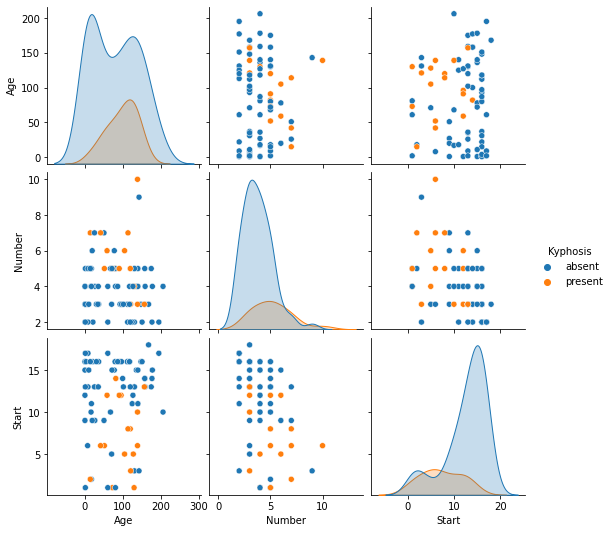

In [14]:
sns.pairplot(kyphosis, hue='Kyphosis')

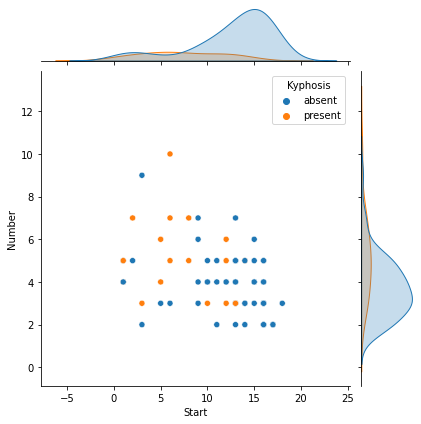

In [16]:
sns.jointplot(data=kyphosis, x='Start', y='Number', hue='Kyphosis')

In [17]:
X = kyphosis.drop('Kyphosis', axis=1)
y = kyphosis['Kyphosis']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

## Decision Tree Classifier

In [24]:
Model = DecisionTreeClassifier(criterion='entropy', )
Model.fit(X_train, y_train)
predictions = Model.predict(X_test)

In [25]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[16  1]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.73      0.94      0.82        17
     present       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25



## Random Forest Classifier

In [45]:
RFC = RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)
predictions = RFC.predict(X_test)

In [46]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[17  0]
 [ 6  2]]


              precision    recall  f1-score   support

      absent       0.74      1.00      0.85        17
     present       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25

